# STAT TESTS FOR SHOP_DURATION

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from scipy import stats
import matplotlib.pyplot as plt

# import statmodels
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.api as sm
import seaborn as sns

# import our utility functions
from utils import create_2cat_table, create_1cat_table
from StatUtils import *

statUtils = StatUtils()

### Load Data

In [105]:
# load data
data = pd.read_csv('dataset/Dataset_heart rate_retail stores.csv')

data.columns


Index(['Id', 'age', 'gender', 'BMI', 'sleeping_time',
       'sporting_activity_(h/week)', 'daytime', 'outdoor_temperature',
       'shopping_cart', 'attendants', 'shopping_frequency', 'cash_point',
       'shopping_amount', 'weekday', 'smoking', 'ex_max', 'ex_min', 'hr_max',
       'max_time', 'hr_min', 'min_time', 'shopping duration (in minutes)',
       'reaching HRmax'],
      dtype='object')

In [3]:
# raname shopping duration (in minutes) for easy handling
data=data.rename(columns = {'shopping duration (in minutes)':'shop_dur'})

## Create categorical vars

For doing ANOVA test, we need some group variable. Here we'll create new categorical variables from exsisting onee for this purpose.

#### But fist remove the siginificant outliers in shoping durations

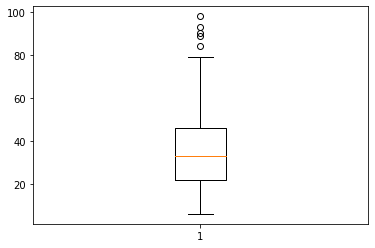

In [5]:
plt.boxplot(x=data['shop_dur'])
plt.show()

In [6]:
# drop outliers
data = statUtils.remove_outliers(data, 'shop_dur')

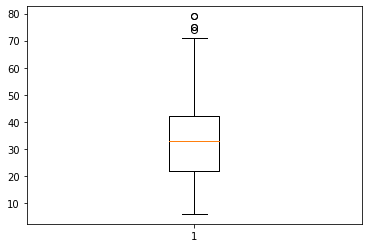

In [7]:
# after droping outliers
plt.boxplot(x=data['shop_dur'])
plt.show()

In [8]:
# make new categorical data
data['age_groups'] = pd.qcut(data['age'], q=4)

# factor data
data['age_groups'] = data['age_groups'].astype(str)

data['age_groups'].value_counts()

(29.0, 40.0]      44
(17.999, 29.0]    41
(52.0, 72.0]      38
(40.0, 52.0]      37
Name: age_groups, dtype: int64

#### 2. for outdoor_temperature

In [9]:
# make new categorical data
data['out_t_groups'] = pd.qcut(data['outdoor_temperature'], q=4)

# factorize data
data['out_t_groups'] = data['out_t_groups'].astype(str)

data['out_t_groups'].value_counts()

(11.999, 18.0]    49
(23.0, 28.0]      38
(21.0, 23.0]      38
(18.0, 21.0]      35
Name: out_t_groups, dtype: int64

#### 3. for sporting_activity_(h/week)

In [10]:
# make new categorical data
data['sport_activity_groups'] = pd.qcut(data['sporting_activity_(h/week)'], q=4)

# factorize data
data['sport_activity_groups'] = data['sport_activity_groups'].astype(str)

data['sport_activity_groups'].value_counts()

(-0.001, 1.0]    54
(2.0, 4.0]       42
(4.0, 14.0]      36
(1.0, 2.0]       28
Name: sport_activity_groups, dtype: int64

#### 4. for sleeping_time

In [11]:
# make new categorical data
data['sleeping_time_groups'] = pd.qcut(data['sleeping_time'], q=4)

# factorize data
data['sleeping_time_groups'] = data['sleeping_time_groups'].astype(str)

data['sleeping_time_groups'].value_counts()

(7.0, 8.0]      50
(6.0, 7.0]      47
(2.999, 6.0]    41
(8.0, 12.0]     22
Name: sleeping_time_groups, dtype: int64

#### 5. for ex_max

In [12]:
# make new categorical data
data['ex_max_groups'] = pd.qcut(data['ex_max'], q=4)

# factorize data
data['ex_max_groups'] = data['ex_max_groups'].astype(str)

data['ex_max_groups'].value_counts()

(69.999, 106.0]    41
(106.0, 116.0]     41
(124.25, 148.0]    40
(116.0, 124.25]    38
Name: ex_max_groups, dtype: int64

#### 6. for ex_min

In [13]:
# make new categorical data
data['ex_min_groups'] = pd.qcut(data['ex_min'], q=4)

# factorize data
data['ex_min_groups'] = data['ex_min_groups'].astype(str)

data['ex_min_groups'].value_counts()

(43.999, 65.0]    44
(80.25, 120.0]    40
(65.0, 72.0]      38
(72.0, 80.25]     38
Name: ex_min_groups, dtype: int64

#### 7. for max_time

In [14]:
# make new categorical data
data['max_time_groups'] = pd.qcut(data['max_time'], q=4)

# factorize data
data['max_time_groups'] = data['max_time_groups'].astype(str)

data['max_time_groups'].value_counts()

(0.999, 8.0]    43
(16.5, 31.0]    41
(31.0, 74.0]    39
(8.0, 16.5]     37
Name: max_time_groups, dtype: int64

#### 8. for max_time

In [15]:
# make new categorical data
data['min_time_groups'] = pd.qcut(data['min_time'], q=4)

# factorize data
data['min_time_groups'] = data['min_time_groups'].astype(str)

data['min_time_groups'].value_counts()

(0.999, 6.0]     43
(13.0, 23.0]     42
(6.0, 13.0]      38
(23.0, 150.0]    37
Name: min_time_groups, dtype: int64

#### Check the distribution of traget data

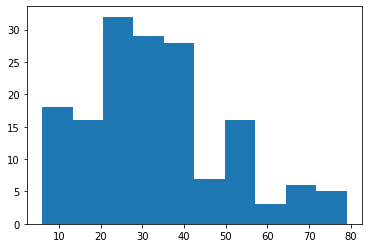

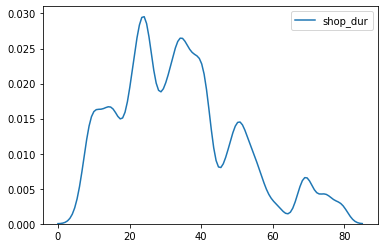

In [16]:
# BEFORE TRANSFORMATION
plt.hist(data['shop_dur'])
plt.show()

sns.kdeplot(data['shop_dur'], cumulative=False, bw=2)

As we can see our traget data don't follow the normal distribution, so we've to apply gaussian transfromation on our data for making it valible for anova test.

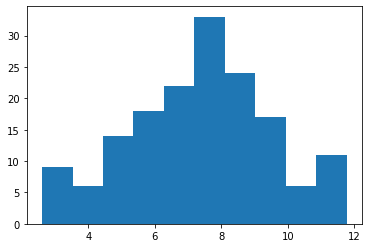

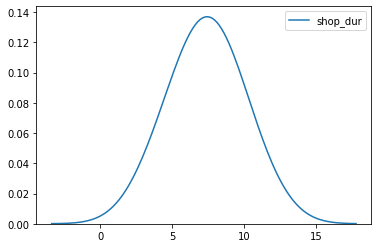

In [17]:
# gaussian transformation
data['shop_dur'], fitted_lambda = stats.boxcox(data['shop_dur'])


# AFTER TRANSFORMATION
plt.hist(data['shop_dur'])
plt.show()

# plot after transformation
sns.kdeplot(data['shop_dur'], cumulative=False, bw=2)

In [18]:
data.head()

,Id,age,gender,BMI,sleeping_time,sporting_activity_(h/week),daytime,outdoor_temperature,shopping_cart,attendants,...,shop_dur,reaching HRmax,age_groups,out_t_groups,sport_activity_groups,sleeping_time_groups,ex_max_groups,ex_min_groups,max_time_groups,min_time_groups
0,1,55,female,30.0,7.0,2.0,noon,23,no,no,...,4.237883,0,"(52.0, 72.0]","(21.0, 23.0]","(1.0, 2.0]","(6.0, 7.0]","(106.0, 116.0]","(65.0, 72.0]","(0.999, 8.0]","(0.999, 6.0]"
1,2,25,female,18.4,9.0,1.0,noon,23,yes,no,...,6.666634,0,"(17.999, 29.0]","(21.0, 23.0]","(-0.001, 1.0]","(8.0, 12.0]","(106.0, 116.0]","(80.25, 120.0]","(16.5, 31.0]","(13.0, 23.0]"
2,3,38,male,25.1,5.0,3.0,noon,23,no,no,...,6.379210,0,"(29.0, 40.0]","(21.0, 23.0]","(2.0, 4.0]","(2.999, 6.0]","(106.0, 116.0]","(72.0, 80.25]","(16.5, 31.0]","(13.0, 23.0]"
3,4,21,female,22.6,8.0,0.0,evening,23,yes,family,...,9.002889,0,"(17.999, 29.0]","(21.0, 23.0]","(-0.001, 1.0]","(7.0, 8.0]","(124.25, 148.0]","(43.999, 65.0]","(16.5, 31.0]","(23.0, 150.0]"
4,5,30,female,21.7,12.0,10.0,evening,23,yes,life partner,...,8.488149,1,"(29.0, 40.0]","(21.0, 23.0]","(4.0, 14.0]","(8.0, 12.0]","(106.0, 116.0]","(43.999, 65.0]","(31.0, 74.0]","(13.0, 23.0]"


# ANOVA

First we'll try to carry out various Anova tests on different group values. Moreover, we'll also try to make some inferences based on ***Anova*** and ***Tukey HSD*** tests. If the assumptions of anova test don't hold, then we'll use some other non-parametric tests such as ***Kruskal–Wallis*** and ***Conover's post hoc*** 

Assumptions for parametric test:

* No outliers in the response data
* Response data should follow a normal distribution
* Residuals of each factor level is normally distributed
* Independence of factors.
* Homogeneity of variance: Homogeneity means that the variance among the groups should be approximately equal

# 1. shop_dur ~ age_groups + gender + age_groups*gender 

In [105]:
create_2cat_table(data, 'age_groups', 'gender', 'shop_dur')

+----------------+----------+-----+------------+------------+------------+------------+
| age_groups     | gender   | N   | shop_dur   | shop_dur   |   shop_dur |   shop_dur |
|                |          |     | mean       | std        |   mean_all |    std_all |
+================+==========+=====+============+============+============+============+
| (17.999, 29.0] | female   | 22  | 8.00       | 2.31       |    7.80943 |    2.34161 |
|                | male     | 19  | 7.59       | 2.36       |            |            |
+----------------+----------+-----+------------+------------+------------+------------+
| (29.0, 40.0]   | female   | 22  | 7.32       | 1.96       |    7.34168 |    1.89317 |
|                | male     | 22  | 7.36       | 1.83       |            |            |
+----------------+----------+-----+------------+------------+------------+------------+
| (40.0, 52.0]   | female   | 22  | 7.48       | 1.93       |    7.14851 |    1.87119 |
|                | male     | 15

In [20]:
lm = smf.ols('shop_dur ~ age_groups + gender + age_groups*gender', data=data).fit()

### Independence of varaibles and homogenity

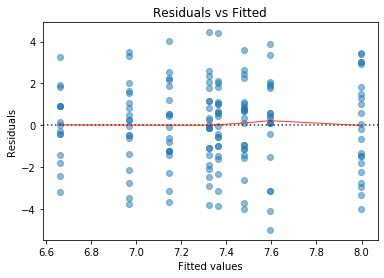

In [21]:
statUtils.independence_test(lm)

This plot shows the residuals (errors) on the y-axis and the fitted values (predicted values) on the x-axis. We can see that plot has no pattern or in other words each goup has same variance, thus the points should look like a more of random points. The plot spoints out that the variances are approximately homogenous since the residuals are distributed approximately equally above and below zero.

### Shaprio-Wild test//qq plot to check the normal distribution of residuals

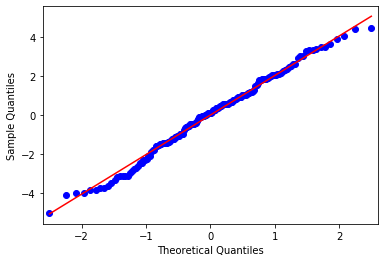

In [22]:
fig = sm.qqplot(lm.resid, line='s')
plt.show()

In [23]:
_, p = stats.shapiro(lm.resid)
print('p-values %.4f' % p)

p-values 0.2378


As the p-value > 0.2378 is significant, we reject null hypothesis and conclude that residuals are normally distributed.

### Calculate anova

As the assumptions of anova meet, now we can calculate it.

In [24]:
sm.stats.anova_lm(lm, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
age_groups,3.0,13.448326,4.482775,1.043450,0.375168
gender,1.0,2.187289,2.187289,0.509132,0.476609
age_groups:gender,3.0,5.795144,1.931715,0.449643,0.717914
Residual,152.0,653.008888,4.296111,NaN,NaN


As we can see from the PR(>F) values, n-Anova test doesn't suggest a significant difference between the effects of age_groups and gender on shopping duration. Also, we can see from the interaction term that the interaction of given factors don't have a significant effect on the response var. 

#### Interaction plot

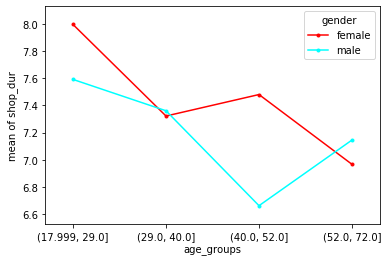

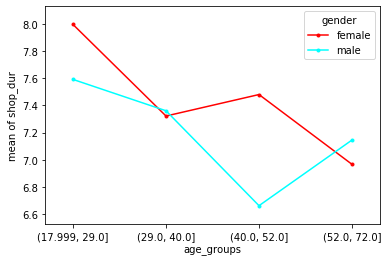

In [25]:
interaction_plot(data['age_groups'], data['gender'], data['shop_dur'])

Although general interaction is not significant, we can still see the relatively some difference between genders on [40, 52] age groups. This explains that female customers of this age grup spend more time in shopping and they have an impact on the males shopping duration.

## 2. shop_dur ~ age_groups

In [26]:
create_1cat_table(data, 'age_groups', 'shop_dur')

+----------------+-----+------------+------------+
| age_groups     |   N |   shop_dur |   shop_dur |
|                |     |       mean |        std |
+================+=====+============+============+
| (17.999, 29.0] |  41 |       7.81 |       2.34 |
+----------------+-----+------------+------------+
| (29.0, 40.0]   |  44 |       7.34 |       1.89 |
+----------------+-----+------------+------------+
| (40.0, 52.0]   |  37 |       7.15 |       1.87 |
+----------------+-----+------------+------------+
| (52.0, 72.0]   |  38 |       7.06 |       1.98 |
+----------------+-----+------------+------------+


In [27]:
lm = smf.ols('shop_dur ~ age_groups', data=data).fit()

### Independence of varaibles

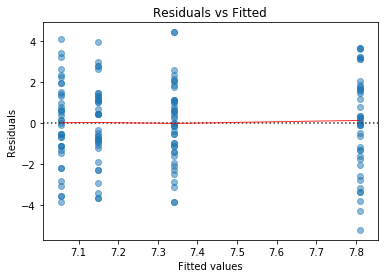

In [28]:
statUtils.independence_test(lm)

This plot shows the residuals (errors) on the y-axis and the fitted values (predicted values) on the x-axis. We can see that plot is randomly distributed, this is independent. We can see that plot has no pattern or in other words each goup has same variance, thus the points should look like a more of random points.

### Homogenity test

In [29]:
groups = np.unique(data['age_groups'])
print(groups)

['(17.999, 29.0]' '(29.0, 40.0]' '(40.0, 52.0]' '(52.0, 72.0]']


In [30]:
w, pvalue = stats.bartlett(data[data['age_groups']==groups[0]]['shop_dur'], 
                           data[data['age_groups']==groups[1]]['shop_dur'], 
                           data[data['age_groups']==groups[2]]['shop_dur'], 
                           data[data['age_groups']==groups[3]]['shop_dur'])
print('p-values %.4f' % pvalue)

p-values 0.4472


As the p-value > 0.4472 is significant, we reject null hypothesis and conclude that treatments have equal variances.

### Shaprio-Wild//qq plot test to check the normal distribution of residuals

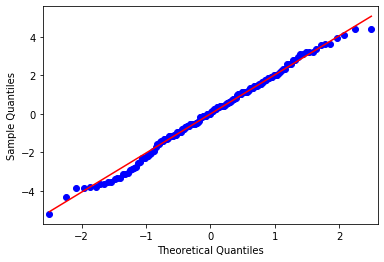

In [31]:
fig = sm.qqplot(lm.resid, line='s')
plt.show()

In [32]:
_, p = stats.shapiro(lm.resid)
print('p-values %.4f' % p)

p-values 0.3456


As the p-value > 0.34 is significant, we reject null hypothesis and conclude that residuals are normally distributed.

## Calculate annova

As the assumptions of anova meet, now we can calculate it.

In [33]:
sm.stats.anova_lm(lm, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
age_groups,3.0,13.448326,4.482775,1.057976,0.368764
Residual,156.0,660.991320,4.237124,NaN,NaN


We don't find a significant main effect of age groups (F = 1.51, p > .37) on shopping durations.

## 3. shop_dur ~ out_t_groups

In [34]:
create_1cat_table(data, 'out_t_groups', 'shop_dur')

+----------------+-----+------------+------------+
| out_t_groups   |   N |   shop_dur |   shop_dur |
|                |     |       mean |        std |
+================+=====+============+============+
| (11.999, 18.0] |  49 |       8.2  |       2.05 |
+----------------+-----+------------+------------+
| (18.0, 21.0]   |  35 |       6.85 |       1.97 |
+----------------+-----+------------+------------+
| (21.0, 23.0]   |  38 |       6.71 |       1.93 |
+----------------+-----+------------+------------+
| (23.0, 28.0]   |  38 |       7.34 |       1.86 |
+----------------+-----+------------+------------+


In [35]:
lm = smf.ols('shop_dur ~ out_t_groups', data=data).fit()

### Independence of varaibles

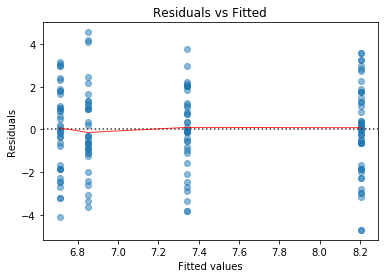

In [36]:
statUtils.independence_test(lm)

This plot shows the residuals (errors) on the y-axis and the fitted values (predicted values) on the x-axis. We can see that plot is randomly distributed, this is independent.

### Homogenity test

In [37]:
groups = np.unique(data['out_t_groups'])
print(groups)

['(11.999, 18.0]' '(18.0, 21.0]' '(21.0, 23.0]' '(23.0, 28.0]']


In [38]:
w, pvalue = stats.bartlett(data[data['out_t_groups']==groups[0]]['shop_dur'], 
                           data[data['out_t_groups']==groups[1]]['shop_dur'], 
                           data[data['out_t_groups']==groups[2]]['shop_dur'], 
                           data[data['out_t_groups']==groups[3]]['shop_dur'])
print('p-values %.4f' % pvalue)

p-values 0.9451


As the p-value > 0.9451 is significant, we reject null hypothesis and conclude that treatments have equal variances.

### Shaprio-Wild//qq plot test to check the normal distribution of residuals

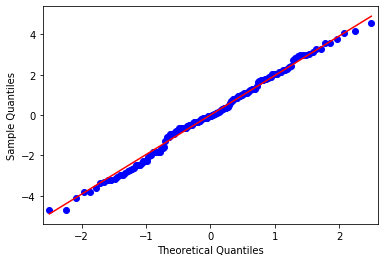

In [39]:
fig = sm.qqplot(lm.resid, line='s')
plt.show()

In [40]:
_, p = stats.shapiro(lm.resid)
print('p-values %.4f' % p)

p-values 0.3649


The p-value > 0.3463 is significant, we reject null hypothesis and conclude that residuals are normally distributed.

### Calculate anova

As the assumptions of anova meet, now we can calculate it.

In [41]:
sm.stats.anova_lm(lm, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
out_t_groups,3.0,60.016781,20.005594,5.079356,0.002208
Residual,156.0,614.422865,3.938608,NaN,NaN


As it's also clear from the table, the ANOVA test suggests us that response of temperature groups on shopping duration is important where  (F = 5.06, p < 0.0022).

### Tukey HSD test

As the ANOVA tels that effect of temperature groups on shopping durations differs significanly. Now using Tukey HSD we can find which groups are significantly different from each other

In [42]:
print(pairwise_tukeyhsd(data['shop_dur'], data['out_t_groups'], alpha=0.05))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
(11.999, 18.0] (18.0, 21.0]  -1.3529 0.0129 -2.4936 -0.2122   True
(11.999, 18.0] (21.0, 23.0]   -1.494 0.0036 -2.6081 -0.3799   True
(11.999, 18.0] (23.0, 28.0]  -0.8642 0.1871 -1.9783    0.25  False
  (18.0, 21.0] (21.0, 23.0]  -0.1412    0.9 -1.3487  1.0664  False
  (18.0, 21.0] (23.0, 28.0]   0.4887 0.6961 -0.7188  1.6962  False
  (21.0, 23.0] (23.0, 28.0]   0.6299 0.5102 -0.5526  1.8123  False
------------------------------------------------------------------


We can see that (11.999, 18.0] and (18.0, 21.0] temperature groups suggest statistically significant differences. This helps us to come to the conclusion that people often go shopping during the cool days.

## 4. shop_dur ~  out_t_groups + gender + out_t_groups*gender

In [43]:
create_2cat_table(data, 'out_t_groups', 'age_groups', 'shop_dur')

+----------------+----------------+-----+------------+------------+------------+------------+
| out_t_groups   | age_groups     | N   | shop_dur   | shop_dur   |   shop_dur |   shop_dur |
|                |                |     | mean       | std        |   mean_all |    std_all |
+================+================+=====+============+============+============+============+
| (11.999, 18.0] | (17.999, 29.0] | 15  | 8.07       | 2.40       |    8.20498 |    2.04615 |
|                | (29.0, 40.0]   | 13  | 7.80       | 2.41       |            |            |
|                | (40.0, 52.0]   | 11  | 8.24       | 1.32       |            |            |
|                | (52.0, 72.0]   | 10  | 8.90       | 1.30       |            |            |
+----------------+----------------+-----+------------+------------+------------+------------+
| (18.0, 21.0]   | (17.999, 29.0] | 8   | 9.15       | 1.68       |    6.85211 |    1.97267 |
|                | (29.0, 40.0]   | 6   | 6.46       | 1.36 

In [44]:
lm = smf.ols('shop_dur ~ out_t_groups + age_groups + out_t_groups*age_groups', data=data).fit()

### Independence of varaibles and homogenity

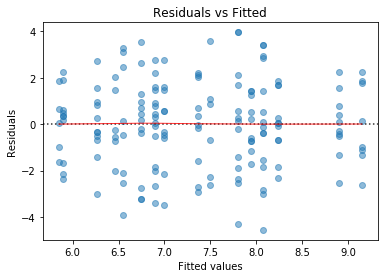

In [45]:
statUtils.independence_test(lm)

We can see that plot has no pattern or in other words each goup has same variance, thus the points should look like a more of random points. The plot spoints out that the variances are approximately homogenous since the residuals are distributed approximately equally above and below zero.

### Shaprio-Wild test//qq plot to check the normal distribution of residuals

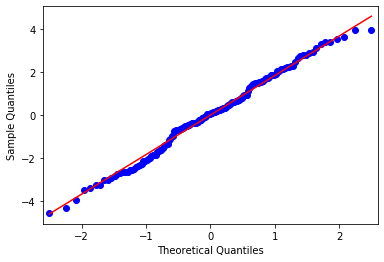

In [46]:
fig = sm.qqplot(lm.resid, line='s')
plt.show()

In [47]:
_, p = stats.shapiro(lm.resid)
print('p-values %.4f' % p)

p-values 0.2869


As the p-value > 0.2742 is significant, we reject null hypothesis and conclude that residuals are normally distributed.

### Calculate anova

As the assumptions of anova meet, now we can calculate it.

In [48]:
sm.stats.anova_lm(lm, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
out_t_groups,3.0,60.016781,20.005594,5.357461,0.001585
age_groups,3.0,9.736605,3.245535,0.869148,0.458709
out_t_groups:age_groups,9.0,66.967871,7.440875,1.992653,0.044131
Residual,144.0,537.718389,3.734155,NaN,NaN


#### Interaction plot

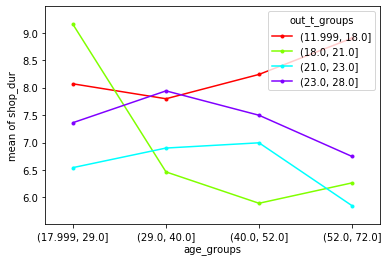

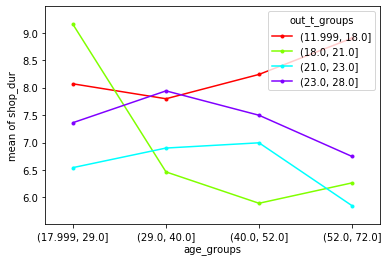

In [49]:
interaction_plot(data['age_groups'], data['out_t_groups'], data['shop_dur'])

Interaction between outdoor temperature groups and age groups is significant (p < 0.04). As it's clear from the above plot, it's that still can be important for capturing some pattern on customer behaviour. From the interaction plot, we can see temperature shows different effect on age groups.  

## 5. shop_dur ~ attendants

In [50]:
create_1cat_table(data, 'attendants', 'shop_dur')

+---------------+-----+------------+------------+
| attendants    |   N |   shop_dur |   shop_dur |
|               |     |       mean |        std |
+===============+=====+============+============+
| family        |  11 |       8.03 |       1.66 |
+---------------+-----+------------+------------+
| family member |  13 |       7.31 |       1.71 |
+---------------+-----+------------+------------+
| life partner  |  53 |       8.53 |       1.8  |
+---------------+-----+------------+------------+
| little child  |   6 |       8.1  |       1.5  |
+---------------+-----+------------+------------+
| no            |  77 |       6.39 |       1.87 |
+---------------+-----+------------+------------+


In [51]:
lm = smf.ols('shop_dur ~ attendants', data=data).fit()

### Independence of varaibles

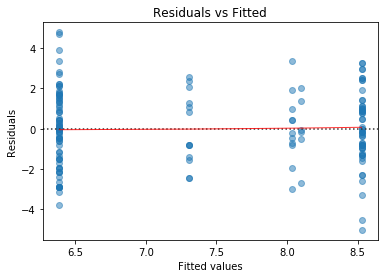

In [52]:
statUtils.independence_test(lm)

This plot shows the residuals (errors) on the y-axis and the fitted values (predicted values) on the x-axis. We can see that plot is randomly distributed, this is independent.

### Homogenity test

In [53]:
groups = np.unique(data['attendants'])
print(groups)

['family' 'family member' 'life partner' 'little child' 'no']


In [54]:
w, pvalue = stats.bartlett(data[data['attendants']==groups[0]]['shop_dur'], 
                           data[data['attendants']==groups[1]]['shop_dur'], 
                           data[data['attendants']==groups[2]]['shop_dur'], 
                           data[data['attendants']==groups[3]]['shop_dur'],
                           data[data['attendants']==groups[4]]['shop_dur'])
print('p-values %.4f' % pvalue)

p-values 0.9915


As the p-value > 0.9915 is significant, we reject null hypothesis and conclude that treatments have equal variances.

### Shaprio-Wild//qq plot test to check the normal distribution of residuals

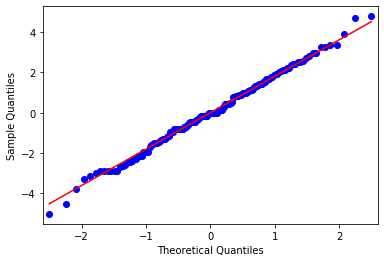

In [55]:
fig = sm.qqplot(lm.resid, line='s')
plt.show()

In [56]:
_, p = stats.shapiro(lm.resid)
print('p-values %.4f' % p)

p-values 0.9520


As the p-value > 0.97 is significant, we reject null hypothesis and conclude that residuals are normally distributed.

### Calculate anova

Met assumptions now let us carry out ANOVA test

In [57]:
sm.stats.anova_lm(lm, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
attendants,4.0,153.148161,38.287040,11.384209,3.982284e-08
Residual,155.0,521.291485,3.363171,NaN,NaN


Having F < 0.000001, ANOVA test shows us that shopping duration upon attendants varies significantly from each other. We can also see from the table that, people spend more time on shopping when they're with family or life partner than they're alone. 

## 6. shop_dur ~ shopping_cart

In [58]:
create_1cat_table(data, 'shopping_cart', 'shop_dur')

+-----------------+-----+------------+------------+
| shopping_cart   |   N |   shop_dur |   shop_dur |
|                 |     |       mean |        std |
+=================+=====+============+============+
| no              |  65 |       6.13 |       1.89 |
+-----------------+-----+------------+------------+
| yes             |  95 |       8.18 |       1.72 |
+-----------------+-----+------------+------------+


In [59]:
lm = smf.ols('shop_dur ~ shopping_cart', data=data).fit()

### Independence of varaibles

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


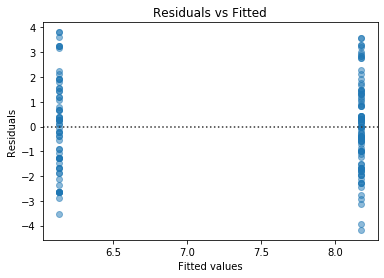

In [60]:
statUtils.independence_test(lm)

This plot shows the residuals (errors) on the y-axis and the fitted values (predicted values) on the x-axis. Although there is a slope slightly leaning to the right, it's enough conclude that plot is randomly distributed, this is independent.

### Homogenity test

In [61]:
w, pvalue = stats.bartlett(data[data['shopping_cart']=='yes']['shop_dur'], 
                           data[data['shopping_cart']=='no']['shop_dur'])
print('p-values %.4f' % pvalue)

p-values 0.3933


As the p-value > 0.3933 is significant, we reject null hypothesis and conclude that treatments have equal variances.

### Shaprio-Wild//qq plot test to check the normal distribution of residuals

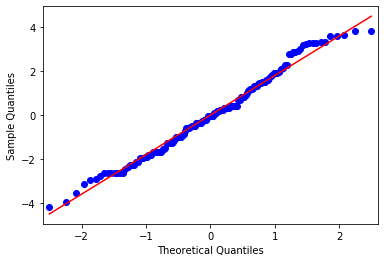

In [62]:
fig = sm.qqplot(lm.resid, line='s')
plt.show()

In [63]:
_, p = stats.shapiro(lm.resid)
print('p-values %.6f' % p)

p-values 0.061953


As the p-value is significant, we reject null hypothesis and conclude that residuals are normally distributed.

### Calculate anova

All the assumptions meet, no we're good to go!

In [64]:
sm.stats.anova_lm(lm, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
shopping_cart,1.0,161.827869,161.827869,49.879469,4.902852e-11
Residual,158.0,512.611778,3.244378,NaN,NaN


Here we can see that the null hypothesis is externally week. This suggests that taking a shopping cart on shopping definitely increase the duration of time a customer spends on shopping. This can be an important insight for markets on finding ways to increase the time customer spend on shopping, thus spend more money. 

## 7. shop_dur ~ weekday

In [65]:
create_1cat_table(data, 'weekday', 'shop_dur')

+-----------+-----+------------+------------+
| weekday   |   N |   shop_dur |   shop_dur |
|           |     |       mean |        std |
+===========+=====+============+============+
| friday    |  33 |       7.19 |       1.86 |
+-----------+-----+------------+------------+
| monday    |  23 |       7.46 |       2.05 |
+-----------+-----+------------+------------+
| saturday  |  34 |       8.32 |       1.8  |
+-----------+-----+------------+------------+
| thursday  |  29 |       6.45 |       2.27 |
+-----------+-----+------------+------------+
| tuesday   |  19 |       7.05 |       2.02 |
+-----------+-----+------------+------------+
| wednesday |  22 |       7.41 |       1.78 |
+-----------+-----+------------+------------+


### Independence of variables

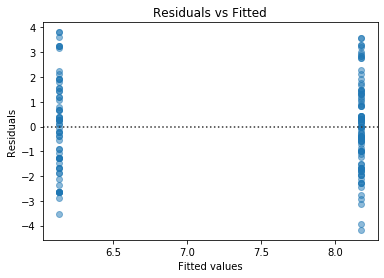

In [66]:
statUtils.independence_test(lm)

From the plot, we can see that independece of variables holds.

### Homogenity test

In [67]:
w, pvalue = stats.bartlett(data[data['weekday']=='friday']['shop_dur'], 
                           data[data['weekday']=='monday']['shop_dur'],
                           data[data['weekday']=='saturday']['shop_dur'],
                           data[data['weekday']=='thursday']['shop_dur'],
                           data[data['weekday']=='tuesday']['shop_dur'],
                           data[data['weekday']=='wednesday']['shop_dur']
                          )
print('p-values %.6f' % pvalue)

p-values 0.786189


Homogenity holds.

### Shaprio-Wild//qq plot test to check the normal distribution of residuals

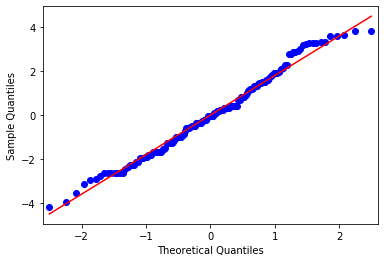

p-values 0.0620


In [68]:
fig = sm.qqplot(lm.resid, line='s')
plt.show()

_, p = stats.shapiro(lm.resid)
print('p-values %.4f' % p)

Normality of distribution holds as well.

### Calculate anova

In [69]:
        sm.stats.anova_lm(lm, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
shopping_cart,1.0,161.827869,161.827869,49.879469,4.902852e-11
Residual,158.0,512.611778,3.244378,NaN,NaN


We can see that there is difference between the weekdays.

### Tukey HSD test

As the ANOVA tels that effect of weekday groups on shopping amount differs significanly. Now using Tukey HSD we can find which groups are significantly different from each other

In [70]:
print(pairwise_tukeyhsd(data['shop_dur'], data['weekday'], alpha=0.05))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
  friday    monday   0.2699    0.9 -1.2981  1.8379  False
  friday  saturday    1.133 0.1931 -0.2777  2.5436  False
  friday  thursday  -0.7339 0.6769 -2.2032  0.7354  False
  friday   tuesday  -0.1395    0.9 -1.8019  1.5229  False
  friday wednesday   0.2264    0.9 -1.3625  1.8152  False
  monday  saturday   0.8631 0.5873 -0.6954  2.4216  False
  monday  thursday  -1.0038 0.4717 -2.6155   0.608  False
  monday   tuesday  -0.4093    0.9 -2.1989  1.3803  False
  monday wednesday  -0.0435    0.9  -1.765   1.678  False
saturday  thursday  -1.8668 0.0041  -3.326 -0.4077   True
saturday   tuesday  -1.2724 0.2343 -2.9259   0.381  False
saturday wednesday  -0.9066  0.554 -2.4861  0.6729  False
thursday   tuesday   0.5944    0.9 -1.1094  2.2982  False
thursday wednesday   0.9603 0.5302 -0.6718  2.5924  False
 tuesday wedne

## 7. shop_dur ~ smoking

In [71]:
create_1cat_table(data, 'smoking', 'shop_dur')

+-----------+-----+------------+------------+
|   smoking |   N |   shop_dur |   shop_dur |
|           |     |       mean |        std |
+===========+=====+============+============+
|         0 |  99 |       7.51 |       2.12 |
+-----------+-----+------------+------------+
|         1 |  61 |       7.09 |       1.91 |
+-----------+-----+------------+------------+


In [72]:
lm = smf.ols('shop_dur ~ smoking', data=data).fit()

### Independence of varaibles

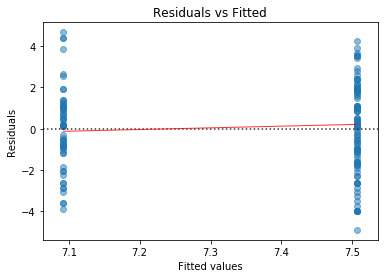

In [73]:
statUtils.independence_test(lm)

From the plot, we can see that independece of variables holds.

### Homogenity test

In [74]:
w, pvalue = stats.bartlett(data[data['smoking']==0]['shop_dur'], 
                           data[data['smoking']==1]['shop_dur'])
print('p-values %.6f' % pvalue)

p-values 0.376838


AS the p-value is significant, thus, homogenity holds.

### Shaprio-Wild//qq plot test to check the normal distribution of residuals

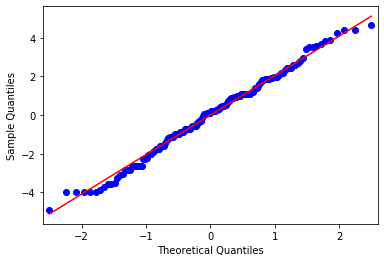

In [75]:
fig = sm.qqplot(lm.resid, line='s')
plt.show()

In [76]:
_, p = stats.shapiro(lm.resid)
print('p-values %.4f' % p)

p-values 0.2762


As the p-value < 0.26 is significant, we reject null hypothesis and conclude that residuals are normally distributed.

#### Calculate anova

In [77]:
sm.stats.anova_lm(lm, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
smoking,1.0,6.496883,6.496883,1.536819,0.21693
Residual,158.0,667.942764,4.227486,NaN,NaN


Anova test, doens't let us to infer that the customes those are smoker are intend to spend less time inside shopping.

## 8.  
#### shop_dur ~ daytime + sleeping_time_groups + sport_activity_groups + daytime*sleeping_time_groups + daytime*sport_activity_groups +sleeping_time_groups*sport_activity_groups

In [78]:
create_1cat_table(data, 'sleeping_time_groups', 'shop_dur')

+------------------------+-----+------------+------------+
| sleeping_time_groups   |   N |   shop_dur |   shop_dur |
|                        |     |       mean |        std |
+========================+=====+============+============+
| (2.999, 6.0]           |  41 |       6.88 |       1.86 |
+------------------------+-----+------------+------------+
| (6.0, 7.0]             |  47 |       7.15 |       1.99 |
+------------------------+-----+------------+------------+
| (7.0, 8.0]             |  50 |       7.45 |       2.05 |
+------------------------+-----+------------+------------+
| (8.0, 12.0]            |  22 |       8.42 |       2.12 |
+------------------------+-----+------------+------------+


In [79]:
lm = smf.ols('shop_dur ~ daytime + sleeping_time_groups + sport_activity_groups\
            + daytime*sleeping_time_groups + daytime*sport_activity_groups\
            + sleeping_time_groups*sport_activity_groups', data=data).fit()

### Independence of varaibles and homogenity

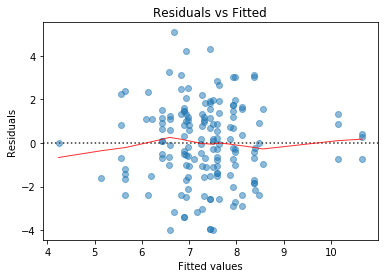

In [82]:
statUtils.independence_test(lm)

This plot shows the residuals (errors) on the y-axis and the fitted values (predicted values) on the x-axis. We can see that plot has no pattern or in other words each goup has same variance, thus the points should look like a more of random points. The plot spoints out that the variances are approximately homogenous since the residuals are distributed approximately equally above and below zero.

### Shaprio-Wild test//qq plot to check the normal distribution of residuals

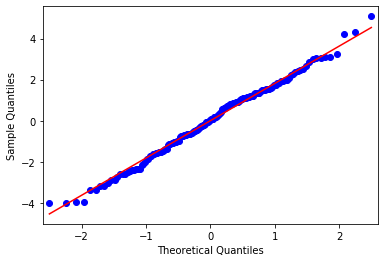

In [83]:
fig = sm.qqplot(lm.resid, line='s')
plt.show()

In [84]:
_, p = stats.shapiro(lm.resid)
print('p-values %.4f' % p)

p-values 0.5111


As the p-value > 0.5178 is significant, we reject null hypothesis and conclude that residuals are normally distributed.

## Calcualate anova

As the assumptions of anova meet, now we can calculate it.

In [85]:
sm.stats.anova_lm(lm, type=3)

,df,sum_sq,mean_sq,F,PR(>F)
daytime,2.0,5.929775,2.964888,0.730984,0.483403
sleeping_time_groups,3.0,34.763788,11.587929,2.856969,0.039629
sport_activity_groups,3.0,10.549996,3.516665,0.867023,0.460082
daytime:sleeping_time_groups,6.0,37.126611,6.187769,1.525576,0.174695
daytime:sport_activity_groups,6.0,8.199570,1.366595,0.336930,0.916294
sleeping_time_groups:sport_activity_groups,9.0,50.587123,5.620791,1.385789,0.200892
Residual,130.0,527.282784,4.056021,NaN,NaN


Here we have calculated ANOVA response of daytime, sleeping time, sports activities number and their interaction on shopping duration. We only observed a significant difference in sleeping time group. Using this insight, companies can look for ways to target their customer concerning their daily life.

#### Interaction plot

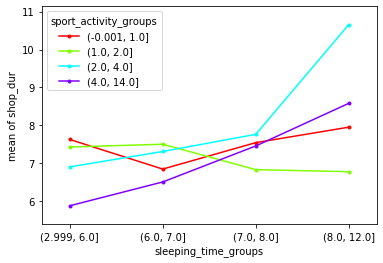

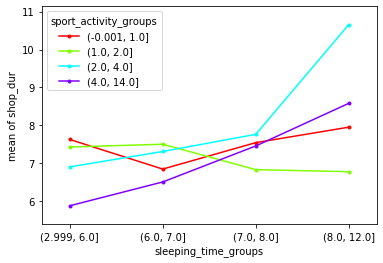

In [86]:
interaction_plot(data['sleeping_time_groups'], data['sport_activity_groups'], data['shop_dur'])

Interaction plot suggests that poeople sleeping more than 8 hours and actively participate in sports activities tended to spend more time in shopping.

## 9. shop_dur ~ ex_max_groups (ex_min_groups)

In [87]:
create_1cat_table(data, 'ex_max_groups', 'shop_dur')

+-----------------+-----+------------+------------+
| ex_max_groups   |   N |   shop_dur |   shop_dur |
|                 |     |       mean |        std |
+=================+=====+============+============+
| (106.0, 116.0]  |  41 |       7.07 |       1.66 |
+-----------------+-----+------------+------------+
| (116.0, 124.25] |  38 |       7.54 |       1.8  |
+-----------------+-----+------------+------------+
| (124.25, 148.0] |  40 |       7.24 |       2.31 |
+-----------------+-----+------------+------------+
| (69.999, 106.0] |  41 |       7.55 |       2.31 |
+-----------------+-----+------------+------------+


In [88]:
create_1cat_table(data, 'ex_min_groups', 'shop_dur')

+-----------------+-----+------------+------------+
| ex_min_groups   |   N |   shop_dur |   shop_dur |
|                 |     |       mean |        std |
+=================+=====+============+============+
| (43.999, 65.0]  |  44 |       7.64 |       2.18 |
+-----------------+-----+------------+------------+
| (65.0, 72.0]    |  38 |       7.03 |       2.06 |
+-----------------+-----+------------+------------+
| (72.0, 80.25]   |  38 |       7.45 |       1.81 |
+-----------------+-----+------------+------------+
| (80.25, 120.0]  |  40 |       7.24 |       2.07 |
+-----------------+-----+------------+------------+


As the distribution of ex_min_groups is very similar to the that of ex_max_grops, we won't calculate ANOVA assumptions again for it as well.

In [89]:
lm = smf.ols('shop_dur ~ ex_max_groups', data=data).fit()

### Independence of varaibles

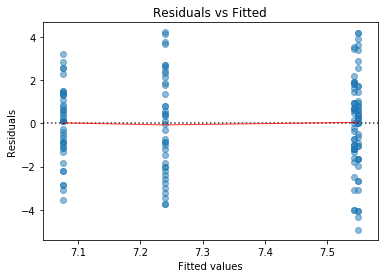

In [90]:
statUtils.independence_test(lm)

This plot shows the residuals (errors) on the y-axis and the fitted values (predicted values) on the x-axis. We can see that plot is randomly distributed, this is independent.

### Homogenity test

In [91]:
groups = np.unique(data['ex_max_groups'])
print(groups)

['(106.0, 116.0]' '(116.0, 124.25]' '(124.25, 148.0]' '(69.999, 106.0]']


In [92]:
w, pvalue = stats.bartlett(data[data['ex_max_groups']==groups[0]]['shop_dur'], 
                           data[data['ex_max_groups']==groups[1]]['shop_dur'], 
                           data[data['ex_max_groups']==groups[2]]['shop_dur'], 
                           data[data['ex_max_groups']==groups[3]]['shop_dur'])
print('p-values %.4f' % pvalue)

p-values 0.0861


This concludes that homogenity among groups holds.

### Shaprio-Wild//qq plot test to check the normal distribution of residuals

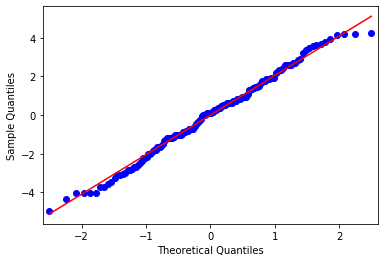

In [93]:
fig = sm.qqplot(lm.resid, line='s')
plt.show()

In [94]:
_, p = stats.shapiro(lm.resid)
print('p-values %.4f' % p)

p-values 0.2614


As the p-value < 0.2523 is significant, we reject null hypothesis and conclude that residuals are normally distributed.

### Calculate anova for both ex_max_groups and ex_min_groups

In [95]:
lm = smf.ols('shop_dur ~ ex_max_groups', data=data).fit()
sm.stats.anova_lm(lm, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
ex_max_groups,3.0,6.647171,2.215724,0.517605,0.670763
Residual,156.0,667.792476,4.280721,NaN,NaN


In [96]:
lm = smf.ols('shop_dur ~ ex_min_groups', data=data).fit()
sm.stats.anova_lm(lm, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
ex_min_groups,3.0,8.291660,2.763887,0.647253,0.585809
Residual,156.0,666.147987,4.270179,NaN,NaN


Annova test alone suggests that given ex_mag_groups and ex_min_groups don't show any different distribution on the response variable, thus not important for capturing necessary information.

## 10. shop_dur ~ max_time_groups (min_time_groups)

In [97]:
create_1cat_table(data, 'max_time_groups', 'shop_dur')

+-------------------+-----+------------+------------+
| max_time_groups   |   N |   shop_dur |   shop_dur |
|                   |     |       mean |        std |
+===================+=====+============+============+
| (0.999, 8.0]      |  43 |       5.8  |       2.11 |
+-------------------+-----+------------+------------+
| (16.5, 31.0]      |  41 |       7.6  |       1.23 |
+-------------------+-----+------------+------------+
| (31.0, 74.0]      |  39 |       9.43 |       1.17 |
+-------------------+-----+------------+------------+
| (8.0, 16.5]       |  37 |       6.67 |       1.43 |
+-------------------+-----+------------+------------+


In [98]:
create_1cat_table(data, 'min_time_groups', 'shop_dur')

+-------------------+-----+------------+------------+
| min_time_groups   |   N |   shop_dur |   shop_dur |
|                   |     |       mean |        std |
+===================+=====+============+============+
| (0.999, 6.0]      |  43 |       6.26 |       2.04 |
+-------------------+-----+------------+------------+
| (13.0, 23.0]      |  42 |       7.63 |       1.37 |
+-------------------+-----+------------+------------+
| (23.0, 150.0]     |  37 |       9.21 |       1.5  |
+-------------------+-----+------------+------------+
| (6.0, 13.0]       |  38 |       6.46 |       1.79 |
+-------------------+-----+------------+------------+


As the distribution of min_time_groups is very similar to the that of max_time_groups, we won't calculate ANOVA assumptions again for it as well.

In [99]:
lm = smf.ols('shop_dur ~ max_time_groups', data=data).fit()

### Independence of varaibles

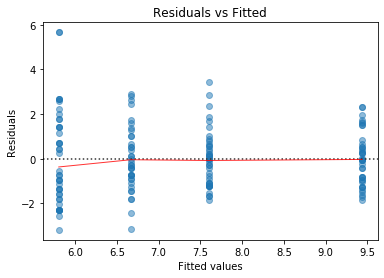

In [100]:
statUtils.independence_test(lm)

This plot shows the residuals (errors) on the y-axis and the fitted values (predicted values) on the x-axis. We can see that plot is randomly distributed, this is independent.

### Homogenity test

In [101]:
groups = np.unique(data['max_time_groups'])
print(groups)

['(0.999, 8.0]' '(16.5, 31.0]' '(31.0, 74.0]' '(8.0, 16.5]']


In [102]:
w, pvalue = stats.bartlett(data[data['max_time_groups']==groups[0]]['shop_dur'], 
                           data[data['max_time_groups']==groups[1]]['shop_dur'], 
                           data[data['max_time_groups']==groups[2]]['shop_dur'], 
                           data[data['max_time_groups']==groups[3]]['shop_dur'])
print('p-values %.4f' % pvalue)

p-values 0.0003


This concludes that homogenity among groups doesn't hold.

### Shaprio-Wild//qq plot test to check the normal distribution of residuals

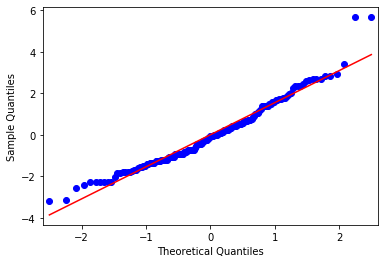

In [103]:
fig = sm.qqplot(lm.resid, line='s')
plt.show()

In [104]:
_, p = stats.shapiro(lm.resid)
print('p-values %.4f' % p)

p-values 0.0005


Normality of residuals aslo don't hold. As the assumptions are not meet, we'll calcualte non-parametric test.

##  Kruskal–Wallis

In [104]:
# group original data
df = [data.loc[group, 'max_time_groups'].values for group in data.groupby('shop_dur').groups.values()]
_, pvalue = stats.kruskal(*df)

print('p-value %.4f' % pvalue)

p-value 0.1600


Kruskal-wallis test suggest ust that the the H0 holds, thus groups has same median, they don't show any difference